# Plotting filled contours with wind vector overlaid on it using Cartopy

#######PYTHON CODE FOR IMD PREPARED BY LEKSHMI S#############

########## https://doi.org/10.5281/zenodo.5674826 ############

In [2]:
###########Import necessary modules##########################
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


In [3]:
############ File to be read ####################
file_name ='/mnt/d/DATA/ERA5/Wind/ERA5_Wind_2019.nc'


In [4]:
################# open file ######################
f = nc.Dataset(file_name)
print(f)                # gives us information about the variables 
                        #contained in the file and their dimensions                      
for var in f.variables.values():
    print(var)          # Metadata for all variables

print(f['u10'])          # Metadata of single variable

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2021-10-22 07:07:25 GMT by grib_to_netcdf-2.23.0: /opt/ecmwf/mars-client/bin/grib_to_netcdf -S param -o /cache/data8/adaptor.mars.internal-1634886380.7778172-32629-6-191c70ed-188a-4f22-af6f-625200725beb.nc /cache/tmp/191c70ed-188a-4f22-af6f-625200725beb-adaptor.mars.internal-1634885492.4869852-32629-2-tmp.grib
    dimensions(sizes): longitude(129), latitude(129), time(8760)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 time(time), int16 u10(time,latitude,longitude), int16 v10(time,latitude,longitude)
    groups: 

<class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    units: degrees_east
    long_name: longitude
unlimited dimensions: 
current shape = (129,)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    units: degrees

/root/anaconda3/envs/pyn_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/root/anaconda3/envs/pyn_env/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  
/root/anaconda3/envs/pyn_env/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  


In [5]:
################# read variables  ################
u10   = f.variables['u10'][:]
v10   = f.variables['v10'][:]
lats = f.variables['latitude'][:]
lons = f.variables['longitude'][:]
time = f.variables['time']		# In the file for the time dimension year has been set as 2010 in all year files

#print(lons.min()," ,",lons.max())
#print(lats)

In [6]:
##############Subscripting over lat, lon and time###############

############Subsetting over time##############
st_date=dt.datetime(2019,6,1,0,0)	# Start date and hour
date=nc.num2date(time[:],units=time.units,calendar='standard')
istart=nc.date2index(st_date,time,calendar='standard',select='exact')

/root/anaconda3/envs/pyn_env/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  """
/root/anaconda3/envs/pyn_env/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  


In [7]:
############Subsetting over lat and lon##############
latbounds = [ 7 , 30 ]	#degrees north
lonbounds = [ 66.5 , 99 ] 	# degrees east 

latselect=np.logical_and(lats>=latbounds[0],lats<=latbounds[1])
lonselect=np.logical_and(lons>=lonbounds[0],lons<=lonbounds[1])

u10sub=u10[:,latselect,:][:,:,lonselect]
U10SUB=u10sub[istart,:,:]

v10sub=u10[:,latselect,:][:,:,lonselect]
V10SUB=u10sub[istart,:,:]

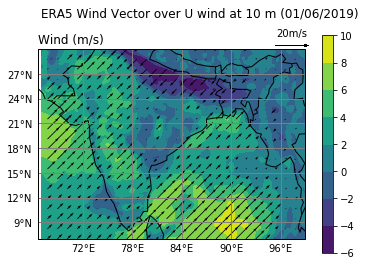

In [8]:
#############Plot Resources#######################
##################Vector Plot Resources################
Lats=lats[latselect]
Lons=lons[lonselect]

plt.figure()
m = plt.axes(projection=ccrs.PlateCarree())
m.add_feature(cartopy.feature.BORDERS, edgecolor='black')
m.set_extent([lonbounds[0], lonbounds[1], latbounds[0], latbounds[1]], crs=ccrs.PlateCarree())
m.coastlines(resolution='110m')

gl=m.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,color='gray',linewidth=1.0)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.suptitle('ERA5 Wind Vector over U wind at 10 m (01/06/2019)')
plt.title('Wind (m/s)', loc='left')
plt.xlabel('Lon')
plt.ylabel('Lat')

c= m.contourf(Lons, Lats, U10SUB, transform=ccrs.PlateCarree())

###################Now overlay Plot vector###############################

q=m.quiver(Lons, Lats, U10SUB, V10SUB, width=0.003, scale_units='xy',scale=5, transform=ccrs.PlateCarree(),regrid_shape=20)
qk=plt.quiverkey (q,0.95, 1.02, 20, '20m/s', labelpos='N')
plt.colorbar(c)